# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/Final_DF/sentiment_analysis_all.csv')

In [3]:
# Replace the category in the column
df['Party'] = df['Party'].replace('Bündnis 90/Die Grünen', 'Die Grünen')

# Who Spoke Most

## Most Sentences

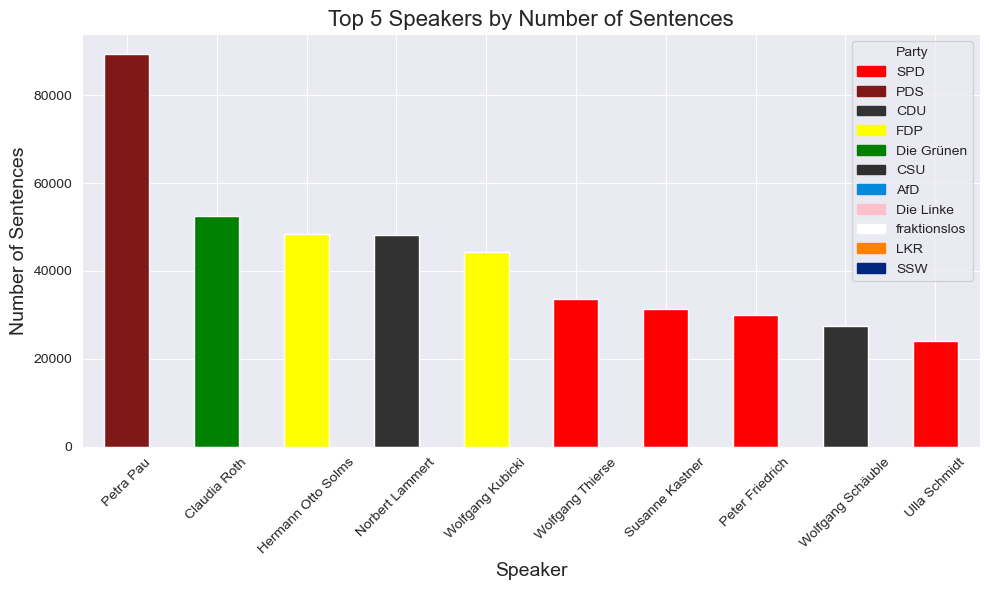

In [4]:
# Calculating the speaker with the most sentences overall
most_sentences_speaker = df['Name'].value_counts().idxmax()

# Calculating the speaker with the longest sentence
df['sentence_length'] = df['Text_Spoken'].apply(len)
longest_sentence_speaker = df.loc[df['sentence_length'].idxmax(), 'Name']

# Generating a barplot for the top 10 names who spoke the most
speaker_counts = df['Name'].value_counts().head(10)


colors = df.drop_duplicates('Name').set_index('Name')['Party'].map({
    'SPD':'red', 'PDS':'#801818', 'CDU':'#323232', 'FDP':'yellow', 'Die Grünen':'green', 'CSU':'#303030', 'AfD':'#0489DB', 'Die Linke':'pink', 'fraktionslos':'white', 'LKR':'#FE8100', 'SSW':'#00277E'
}).reindex(speaker_counts.index)

plt.figure(figsize=(10, 6))

speaker_counts.plot(kind='bar', color=colors)
plt.title('Top 5 Speakers by Number of Sentences', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Adding a legend for the parties
party_colors = {
    'SPD': 'red',
    'PDS': '#801818',
    'CDU': '#323232',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': '#303030',
    'AfD': '#0489DB',
    'Die Linke': 'pink',
    'fraktionslos': 'white',
    'LKR': '#FE8100',
    'SSW': '#00277E'
}

patches = [plt.Rectangle((0,0),1,1, color=party_colors[name]) for name in party_colors]
plt.legend(patches, party_colors.keys(), loc='upper right', title='Party')

plt.show();

#(most_sentences_speaker, longest_sentence_speaker, speaker_counts)


In [5]:
# Count the total number of sentences in the DataFrame
total_sentences = df.shape[0]

total_sentences

4530623

# Sentences by Party

check how many members in each party. and compare number of speakers vs spoken sentences as speaking time per speaker

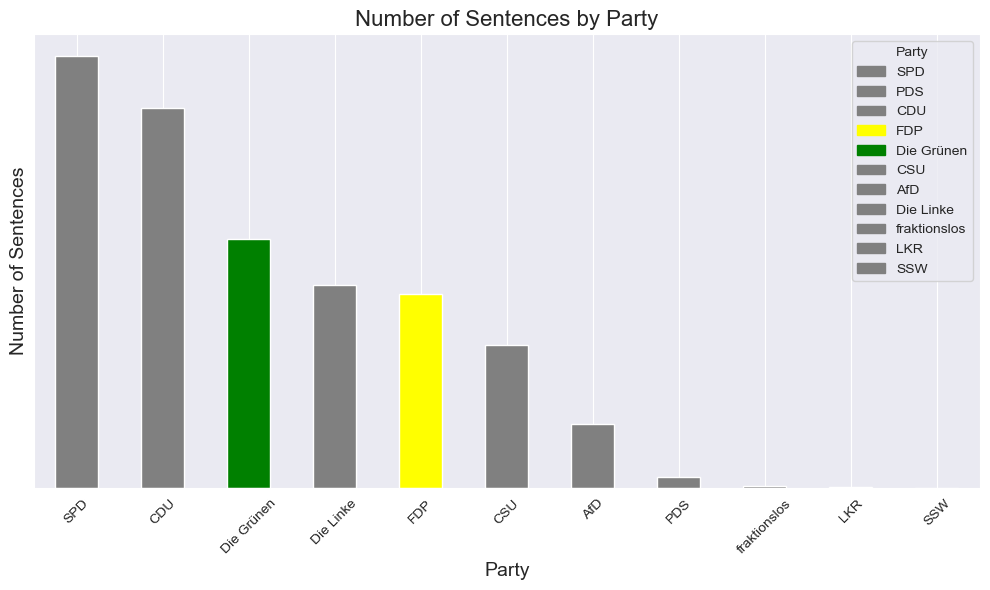

In [22]:
# To order the bars by the number of sentences, we'll sort the party_counts Series in descending order
party_counts = df.groupby('Party')['Text_Spoken'].count()

# Define colors for each party
# party_colors_map = {
#     'SPD': 'red',
#     'PDS': '#801818',
#     'CDU': '#323232',
#     'FDP': 'yellow',
#     'Die Grünen': 'green',
#     'CSU': '#303030',
#     'AfD': '#0489DB',
#     'Die Linke': 'pink',
#     'fraktionslos': 'white',
#     'LKR': '#FE8100',
#     'SSW': '#00277E'
# }
sorted_party_counts = party_counts.sort_values(ascending=False)

# Re-assign colors to each party in the sorted series
sorted_colors = sorted_party_counts.index.map(party_colors_map)

plt.figure(figsize=(10, 6))

# Create the bar plot with the sorted data
sorted_party_counts.plot(kind='bar', color=sorted_colors)
plt.title('Number of Sentences by Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
# Remove the y-tick labels
plt.yticks([])
plt.tight_layout()

# Add the legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map[name]) for name in party_colors_map]
plt.legend(patches, party_colors_map.keys(), loc='upper right', title='Party')
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/Präsentation/Graphs/number_sentence_party.png', bbox_inches='tight')
plt.show();

## Number of words per party

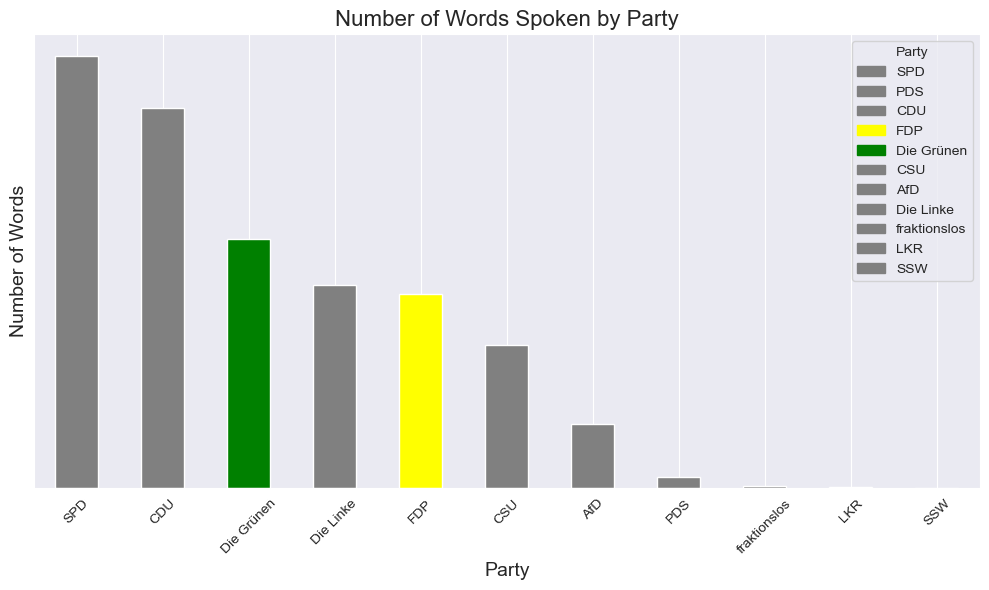

In [20]:
# Count the number of words for each entry in 'Text_Spoken'
df['Word_Count'] = df['Text_Spoken'].apply(lambda text: len(str(text).split()))

# Aggregate the total word count by party
party_word_counts = df.groupby('Party')['Word_Count'].sum()

# Sort the word counts in descending order
sorted_party_word_counts = party_word_counts.sort_values(ascending=False)

# Re-assign colors to each party in the sorted series
sorted_colors = sorted_party_word_counts.index.map(party_colors_map)

plt.figure(figsize=(10, 6))

# Create the bar plot with the sorted data
sorted_party_counts.plot(kind='bar', color=sorted_colors)
# Make sure to update the plot title and y-axis label to reflect that you're now plotting word counts
plt.title('Number of Words Spoken by Party', fontsize=16)
plt.ylabel('Number of Words', fontsize=14)
plt.xlabel('Party', fontsize=14)
plt.xticks(rotation=45)
# Remove the y-tick labels
plt.yticks([])
plt.tight_layout()

# Add the legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map[name]) for name in party_colors_map]
plt.legend(patches, party_colors_map.keys(), loc='upper right', title='Party')
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/Präsentation/Graphs/number_words_party.png', bbox_inches='tight')
plt.show();

# Number of Party Members

In [16]:
# Define colors for each party
party_colors_map = {
    'SPD': 'grey',
    'PDS': 'grey',
    'CDU': 'grey',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'CSU': 'grey',
    'AfD': 'grey',
    'Die Linke': 'grey',
    'fraktionslos': 'grey',
    'LKR': 'grey',
    'SSW': 'grey'
}

<Figure size 1000x600 with 0 Axes>

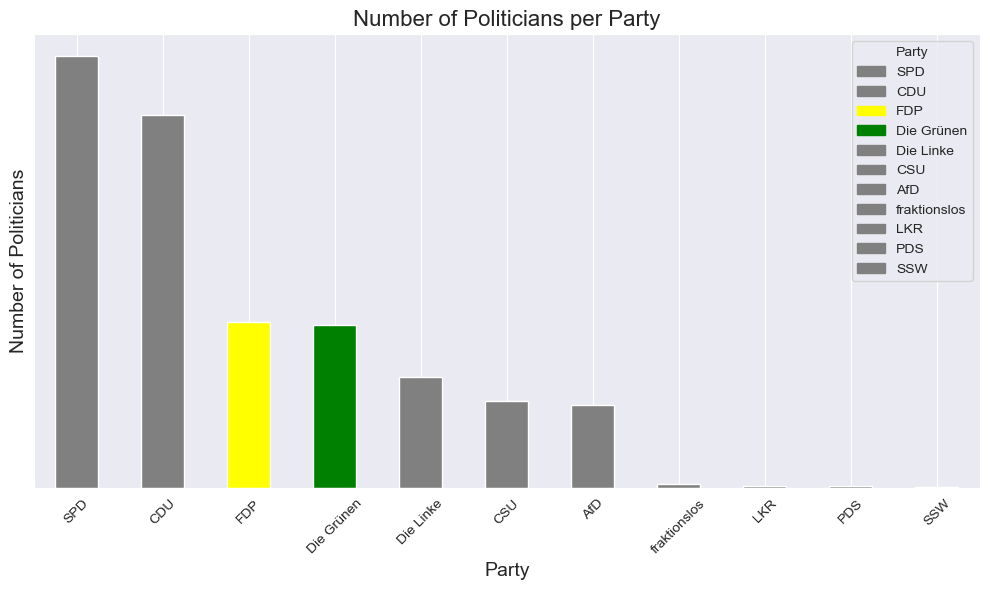

In [21]:
# Counting the number of unique names (speakers) per party
names_per_party = df.groupby('Party')['Name'].nunique().sort_values(ascending=False)
#names_per_party = df.groupby('Party')['Text_Spoken'].count().sort_values(ascending=False)

# Assign colors to each party in the sorted counts
colors = names_per_party.index.map(lambda x: party_colors_map.get(x, 'grey'))  # Default to 'grey' if party not found in map
#colors= ['yellow' if party == 'FDP' else 'green' if party == 'Die Grünen' else 'gray' for party in party_counts.index]
#colors = sorted_party_counts.index.map(lambda x: highlight_color if x == 'FDP' or x=='Die Grünen' else default_color)
plt.figure(figsize=(10, 6),facecolor=background_color)
plt.figure(figsize=(10, 6))

# Create the bar plot with the sorted data
names_per_party.plot(kind='bar', color=colors)
plt.title('Number of Politicians per Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Number of Politicians', fontsize=14)
plt.xticks(rotation=45)
# Remove the y-tick labels
plt.yticks([])
plt.tight_layout()

# Update the legend for the parties
patches = [plt.Rectangle((0,0),1,1, color=party_colors_map.get(name, 'grey')) for name in names_per_party.index]
plt.legend(patches, names_per_party.index, loc='upper right', title='Party')
plt.savefig('/Users/merlesteffen/Documents/Education/WBS_Coding_School/Bootcamp/Sentiment_In_Session/Präsentation/Graphs/number_speakers_sentences.png', bbox_inches='tight')
plt.show();


# Longest sentence

In [10]:
# Calculate the length of each sentence
df['sentence_length'] = df['Text_Spoken'].str.len()

# Find the longest sentence and its speaker
longest_sentence_row = df.loc[df['sentence_length'].idxmax()]

# Print the results
speaker_of_longest_sentence = longest_sentence_row['Name']
longest_sentence = longest_sentence_row['Text_Spoken']

print(f"The speaker of the longest sentence is: {speaker_of_longest_sentence}")
print(f"The longest sentence is: '{longest_sentence}'")

The speaker of the longest sentence is: Norbert Lammert
The longest sentence is: 'zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Klaus Ernst, weiterer Abgeordneter und der Fraktion DIE LINKEK orrektur der Überleitung von DDR Alterssicherungen in bundesdeutsches Recht zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Alterseinkünfte für Beschäftigteim Gesundheits und Sozialwesen der DDR zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Lösung für rentenrechtliche Situation von in der DDR Geschiedenen zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordneter und der Fraktion DIELINKEG erechte Versorgungslösung für Ballettmitglieder in der DDR zu dem Antrag der Abgeordneten Dr Martina Bunge, Dr Gregor Gysi, Dr Dietmar Bartsch,weiterer Abgeordnet

In [11]:
# Calculate the length of each sentence by word count
df['word_count'] = df['Text_Spoken'].apply(lambda s: len(s.split()))

# Find the index of the row with the longest sentence by word count
index_of_longest_sentence_by_word_count = df['word_count'].idxmax()

# Retrieve the number of words in the longest sentence
num_words_in_longest_sentence = df.loc[index_of_longest_sentence_by_word_count, 'word_count']

num_words_in_longest_sentence

637

# Most Reactions

In [12]:
reactions_per_speaker = df.groupby('Name')['Reactions'].count()

reactions_per_speaker.sort_values(ascending=False)

Name
Petra Pau             13069
Wolfgang Kubicki       8038
Norbert Lammert        7486
Claudia Roth           7187
Hermann Otto Solms     5993
                      ...  
Till Seiler               0
Angelika Volquartz        0
Grietje Staffelt          0
Florian Post              0
Andreas Lämmel            0
Name: Reactions, Length: 1775, dtype: int64

In [14]:
# Count words in each row of 'text_spoken' and store it in a new column
df['Word_Count'] = df['Text_Spoken'].str.split().str.len()

# Group by 'Name' and sum the 'Word_Count' for each group
words_per_speaker = df.groupby('Name')['Word_Count'].sum()

words_per_speaker.sort_values(ascending=False)

Name
Petra Pau                             1232398
Norbert Lammert                        676636
Hermann Otto Solms                     662297
Claudia Roth                           581299
Wolfgang Kubicki                       534330
                                       ...   
Stefan Müller                              22
Angelika Volquartz                         17
Marlene Rupprecht                          13
Christoph Ploß                             10
Peter Harry Carstensen(Nordstrand)          5
Name: Word_Count, Length: 1775, dtype: int64